In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import networkx as nx
from pomegranate import * 
from sklearn.model_selection import train_test_split

In [2]:
Tutorial='https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4b_Bayesian_Network_Structure_Learning.ipynb'
print(Tutorial)

https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4b_Bayesian_Network_Structure_Learning.ipynb


In [3]:
def draw_graph():
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    from matplotlib import rc
    import networkx as nx
    
    nodes = df.columns.tolist()
    structure = model.structure
    print('structure:', structure)
    
    edges = []
    for i in range(len(nodes)):
        try:
            for j in range(len(structure[i])):
                edges.append((nodes[structure[i][j]], nodes[i]))
        except IndexError:
            pass


    font_paths = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
#     for i in font_paths:
#         print(i)
    path = 'C:\\Users\\JIHYUN\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'


    font_name = fm.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name, size=30)

    g = nx.DiGraph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)

    fig = plt.figure(figsize=(10, 8))

    pos = nx.circular_layout(g)
    nx.draw(g, with_labels=True,font_family=font_name, edge_color='gray', node_size=1000, node_color='lightsalmon'\
           , cmap=plt.cm.Blues, font_size=15)
    
    

### 와인데이터

In [5]:
df = pd.read_csv('./Data/wine.csv')
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
ar = train_set.to_numpy()
ar.shape

(3918, 12)

In [6]:
print(df.columns.tolist())

['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']


exact
P(D|M):  -33186.3079837916
structure: ((8,), (), (0,), (7,), (), (6,), (10,), (10,), (10,), (10,), (11,), (1,))


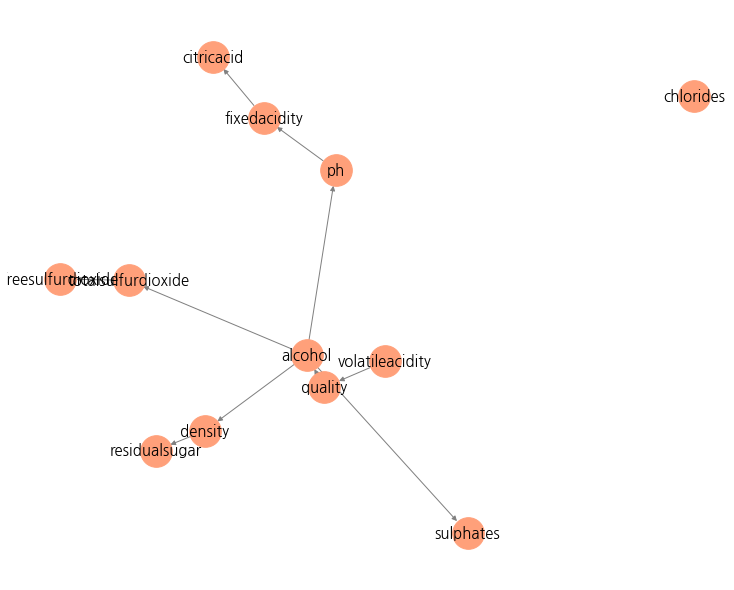

In [5]:
model = BayesianNetwork.from_samples(ar, algorithm='exact')
print('exact')
print("P(D|M): ", model.log_probability(ar).sum())
draw_graph()



P(D|M):  -33186.307983791594
structure: ((8,), (11,), (0,), (7,), (), (6,), (10,), (10,), (10,), (10,), (), (10,))


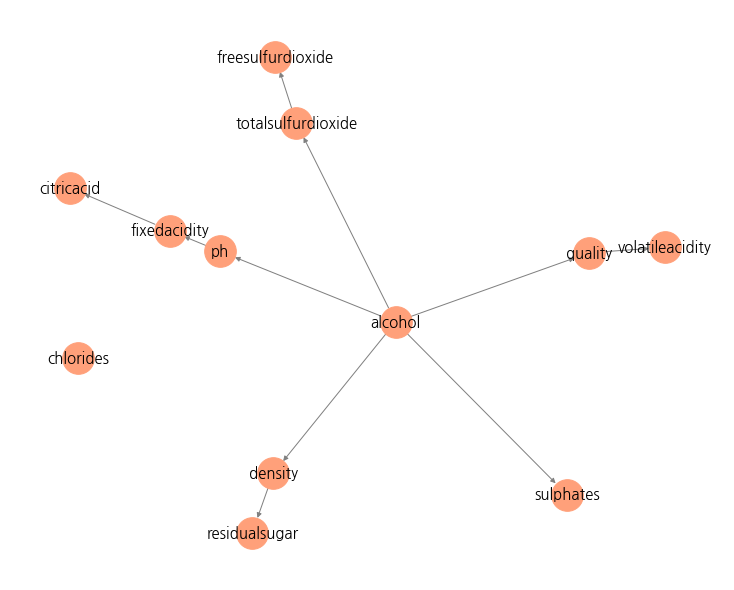

In [14]:
model = BayesianNetwork.from_samples(ar, algorithm='exact-dp')
print("P(D|M): ", model.log_probability(ar).sum())
draw_graph()

P(D|M):  -33492.930817390356
structure: ((), (), (0,), (), (), (), (5, 7), (3,), (0,), (6,), (7, 11), (6,))


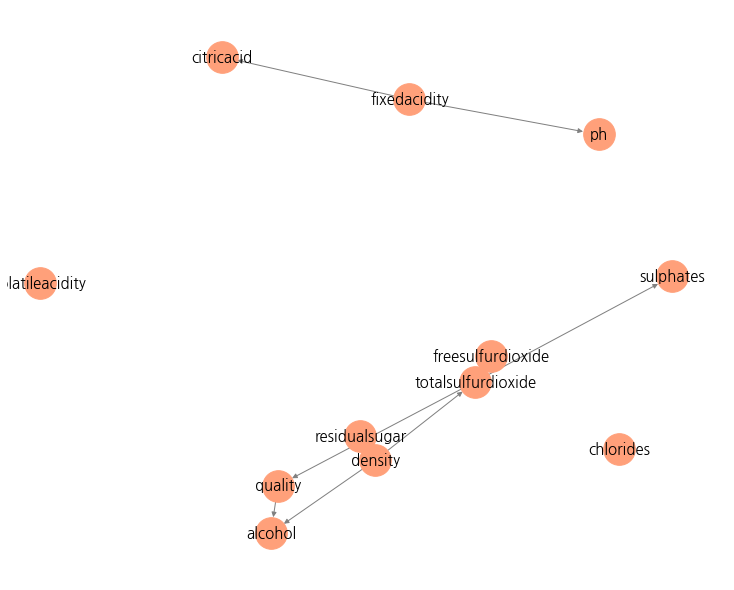

In [12]:
model = BayesianNetwork.from_samples(ar, algorithm='greedy')
print("P(D|M): ", model.log_probability(ar).sum())
draw_graph()

In [13]:
nx.connected_components(g)

NameError: name 'g' is not defined

P(D|M):  -33130.90050934095
structure: ((), (11,), (0,), (7,), (10,), (6,), (10,), (10,), (0,), (10,), (8,), (10,))


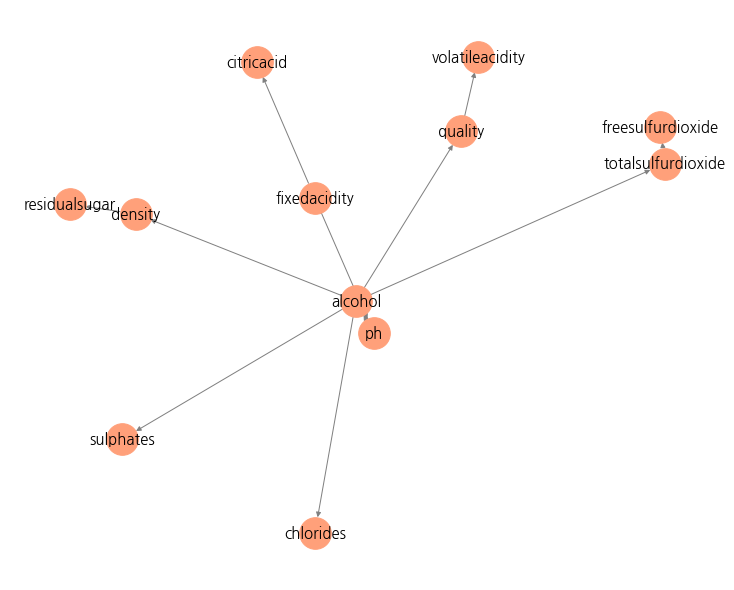

In [16]:
model = BayesianNetwork.from_samples(ar, algorithm='chow-liu')
print("P(D|M): ", model.log_probability(ar).sum())
draw_graph()

### 해상사고 데이터

In [17]:
df = pd.read_csv('./Data/해양경찰청_해상조난사고_상세데이터_현황_20191231.csv', encoding='euckr')
df.rename(columns={'선 종':'선종'},inplace=True)
df = df[['발생일시','관할해경서','발생해역','기상상태','발생원인','발생유형','선종']]
df = df.drop_duplicates()
df['사고월']=df['발생일시'].apply(lambda x: 'January' if x.split('-')[1]=='01' \
                                    else 'February' if x.split('-')[1]=='02'\
                                    else 'March' if x.split('-')[1]=='03'\
                                    else 'April' if x.split('-')[1]=='04'\
                                    else 'May' if x.split('-')[1]=='05'\
                                    else 'June' if x.split('-')[1]=='06'\
                                    else 'July' if x.split('-')[1]=='07'\
                                    else 'August' if x.split('-')[1]=='08'\
                                    else 'September' if x.split('-')[1]=='09'\
                                    else 'October' if x.split('-')[1]=='10'\
                                    else 'November' if x.split('-')[1]=='11'\
                                    else 'December' if x.split('-')[1]=='12'\
                                    else 'etc'
                           )

df = df[['관할해경서','발생해역','기상상태','발생원인','발생유형','선종','사고월']]

# train set, test set split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
ar = df.to_numpy()
print(ar.shape)

(3633, 7)


In [18]:
df.columns.tolist()

['관할해경서', '발생해역', '기상상태', '발생원인', '발생유형', '선종', '사고월']

P(D|M):  -40688.19737495415
structure: ((1,), (5,), (), (1,), (3,), (), ())


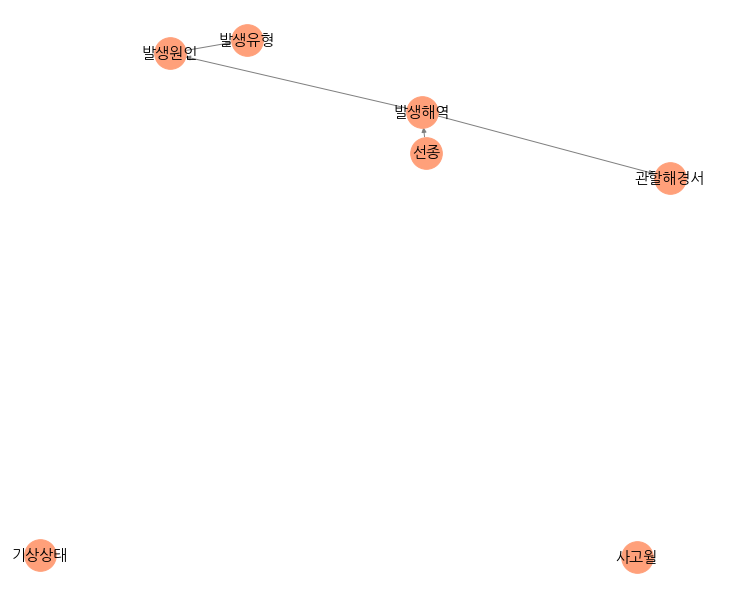

In [19]:
model = BayesianNetwork.from_samples(ar, algorithm='exact')
print("P(D|M): ", model.log_probability(ar).sum())
draw_graph()

P(D|M):  -40688.19737495415
structure: ((1,), (5,), (), (1,), (3,), (), ())


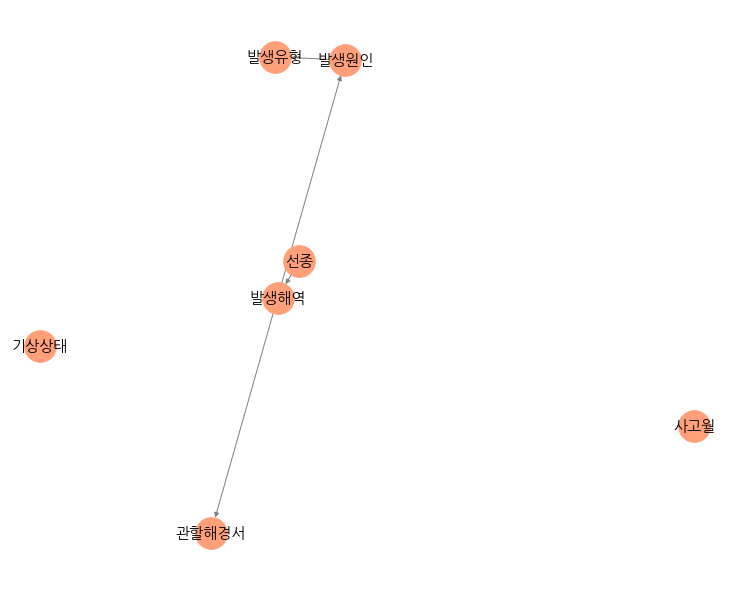

In [20]:
model = BayesianNetwork.from_samples(ar, algorithm='exact-dp')
print("P(D|M): ", model.log_probability(ar).sum())
draw_graph()

P(D|M):  -40688.19737495415
structure: ((1,), (), (), (1,), (3,), (1,), ())


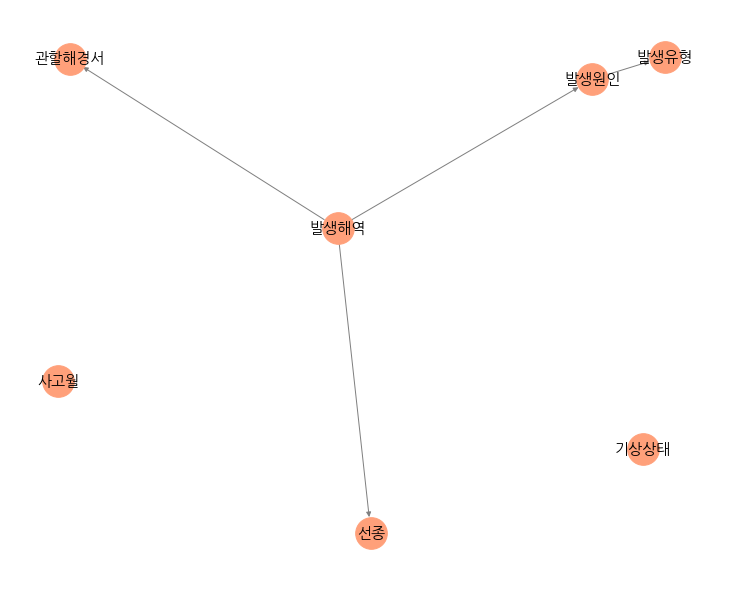

In [21]:
model = BayesianNetwork.from_samples(ar, algorithm='greedy')
print("P(D|M): ", model.log_probability(ar).sum())
draw_graph()

P(D|M):  -39478.33565339989
structure: ((), (0,), (0,), (4,), (5,), (0,), (0,))


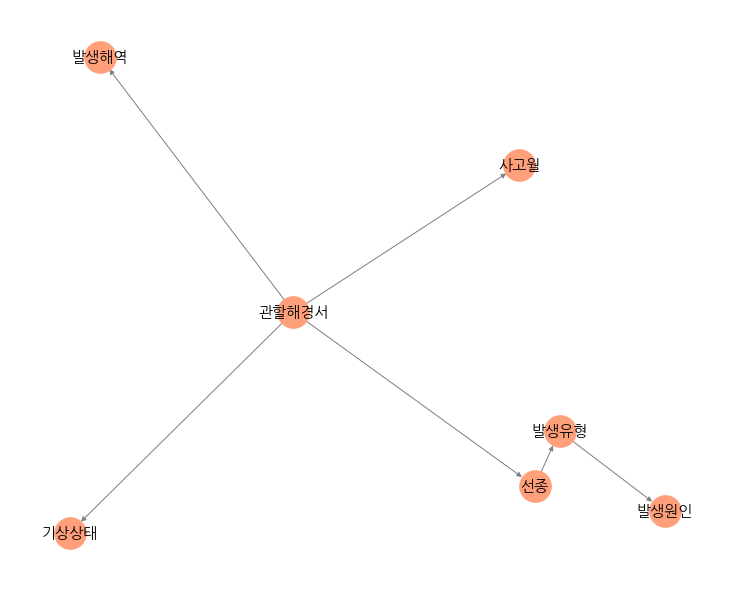

In [22]:
model = BayesianNetwork.from_samples(ar, algorithm='chow-liu')
print("P(D|M): ", model.log_probability(ar).sum())
draw_graph()